<h1>Part 1</h1>

In [1]:
file_name = "../../data_ml_2020/Clothing_Store.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



# this creates a pandas.DataFrame
data = pd.read_csv(file_name)

In [3]:
data.columns

Index(['CUSTOMER_ID', 'ZIP_CODE', 'TOTAL_VISITS', 'TOTAL_SPENT',
       'AVRG_SPENT_PER_VISIT', 'HAS_CREDIT_CARD', 'PSWEATERS', 'PKNIT_TOPS',
       'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS',
       'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION',
       'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND',
       'SPEND_LAST_MONTH', 'SPEND_LAST_3MONTH', 'SPEND_LAST_6MONTH',
       'SPENT_LAST_YEAR', 'GMP', 'PROMOS_ON_FILE', 'DAYS_ON_FILE', 'FREQ_DAYS',
       'MARKDOWN', 'PRODUCT_CLASSES', 'COUPONS', 'STYLES', 'STORES',
       'STORELOY', 'VALPHON', 'WEB', 'MAILED', 'RESPONDED', 'RESPONSERATE',
       'LTFREDAY', 'CLUSTYPE', 'PERCRET', 'RESP'],
      dtype='object')

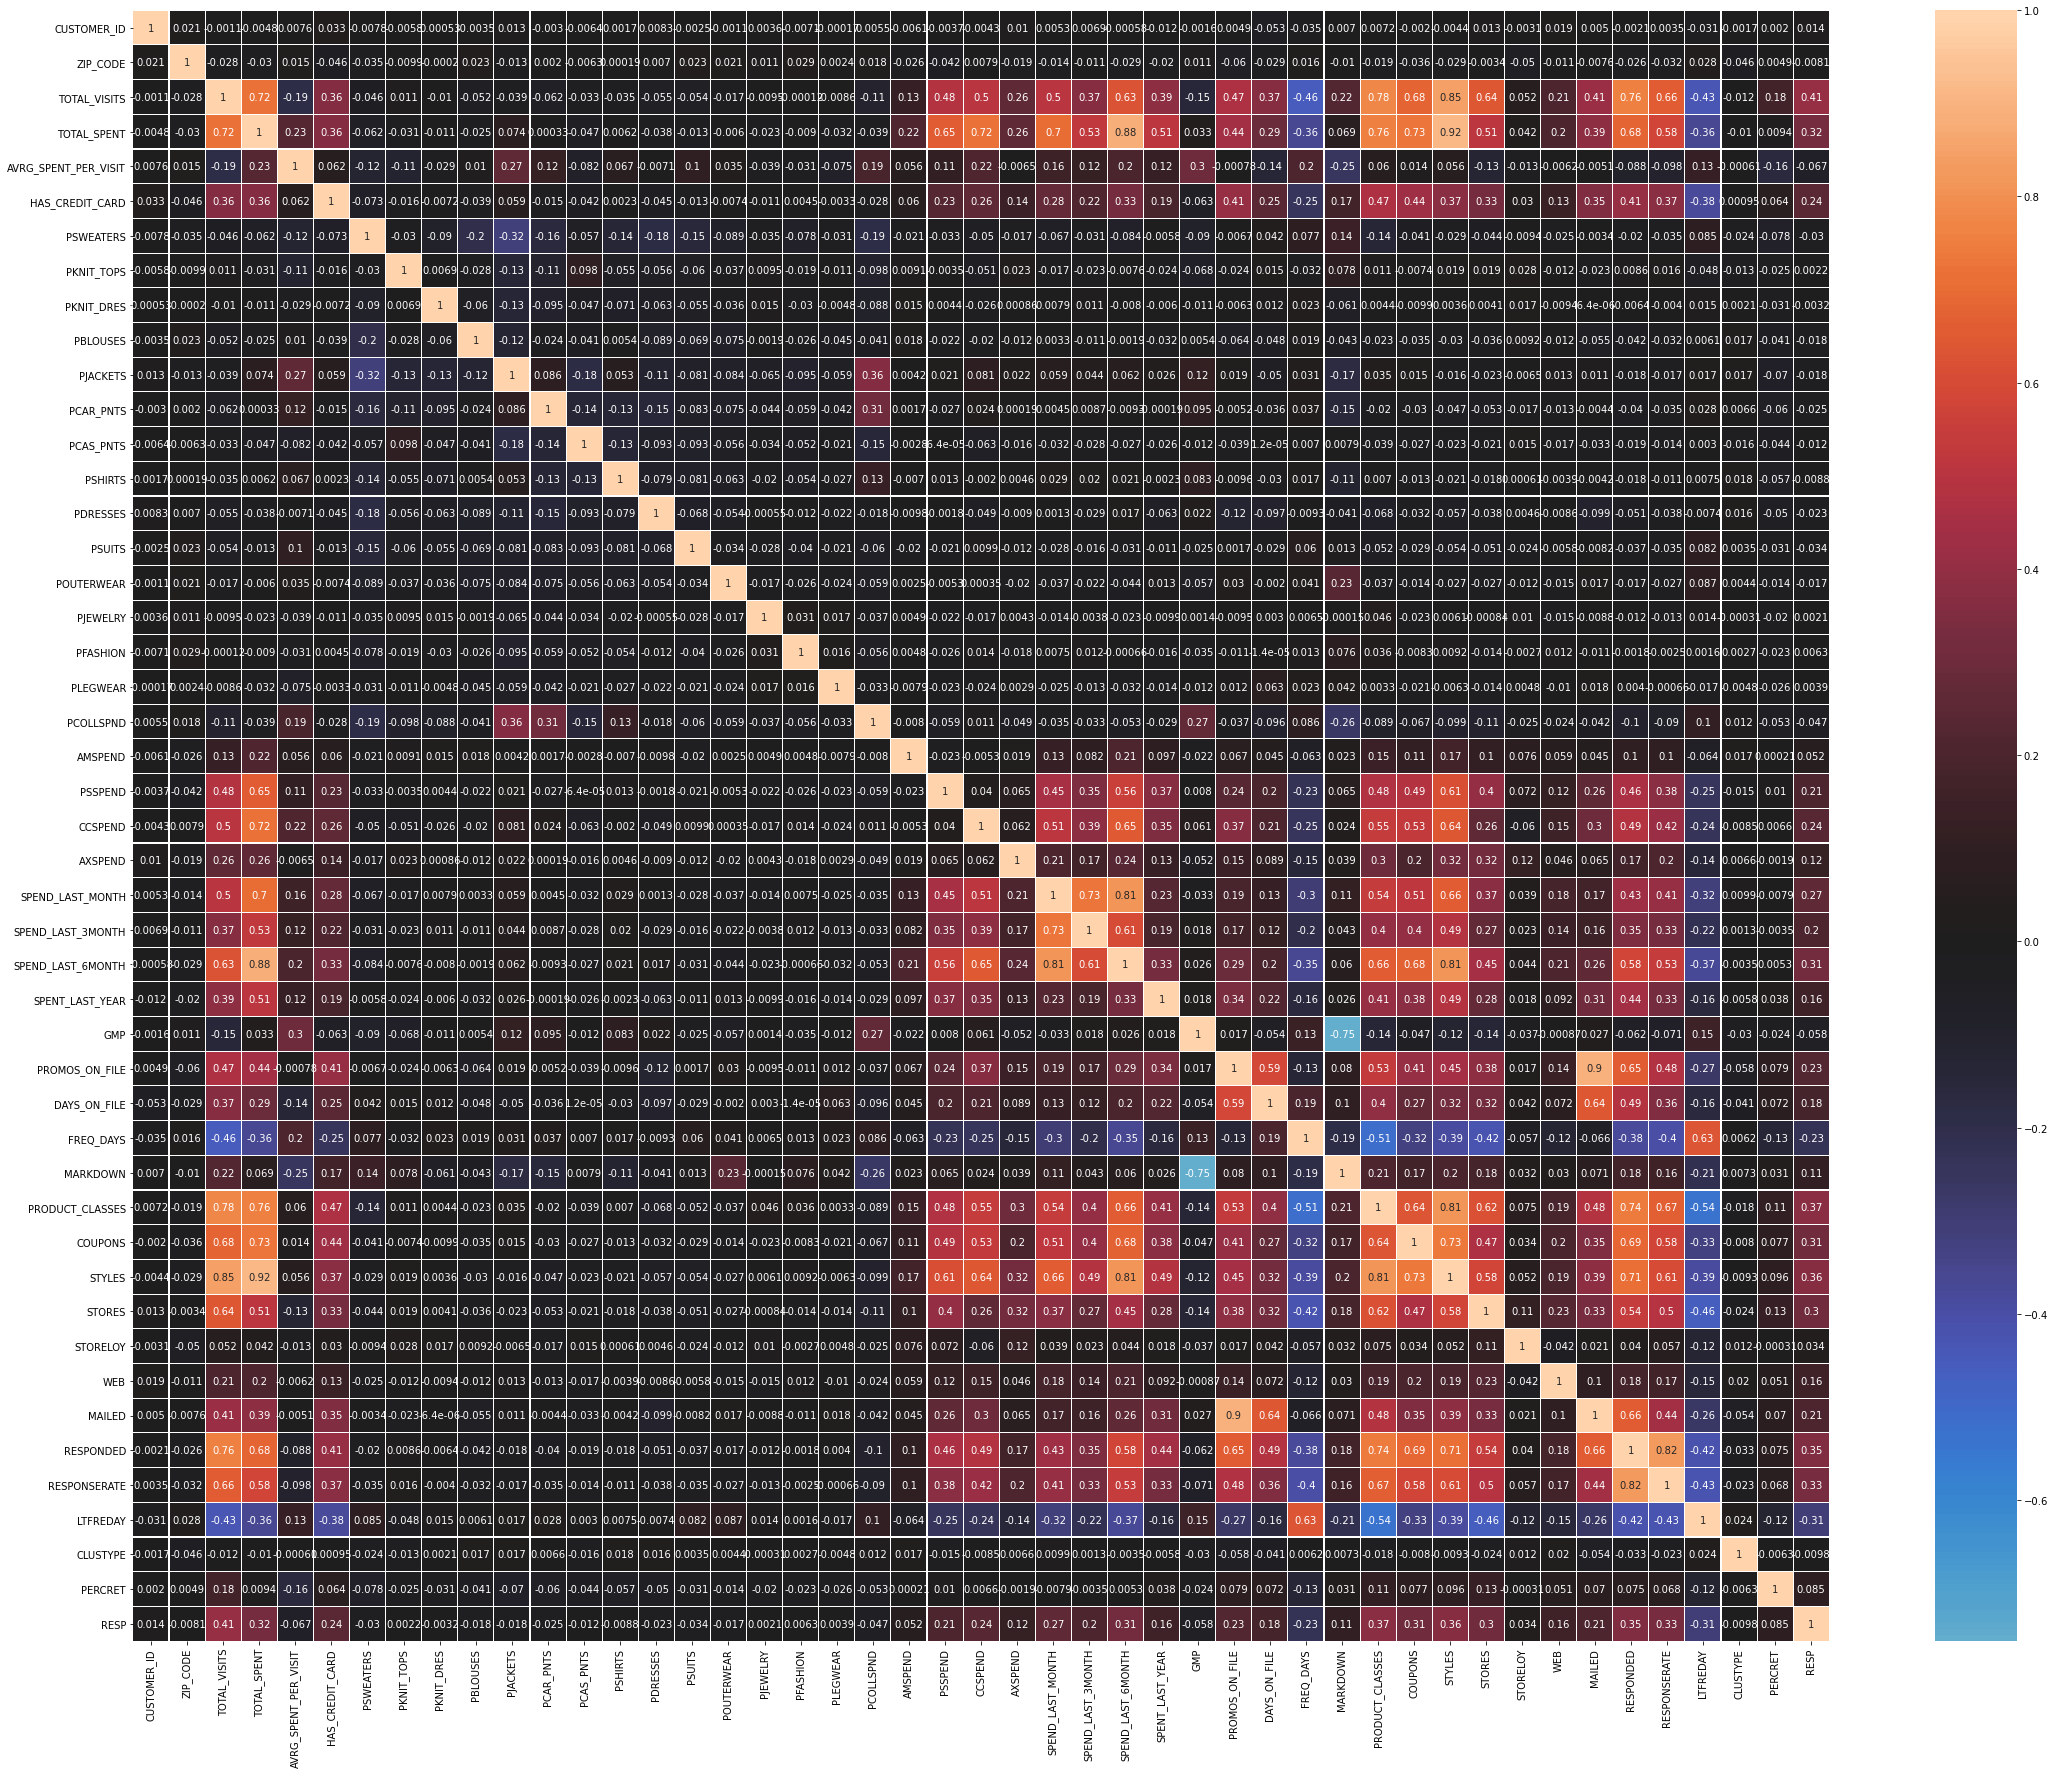

In [4]:
fig, ax = plt.subplots(figsize=(38,30)) 
corr = data.corr()
sns.heatmap(corr, center=0, annot=True, linewidths=.1, ax=ax)

I know about the following classifiers: Logistic Regression, Support Vector Machines, Decision Trees,
k-Nearest Neighbors and Naive Bayes.

There are lots of numeric data so I choose to work with Logistic Regression and k-Nearest Neighbors

<h2>Preprocessing</h2>

From the heat map above, we can see that correlation of some attributes are small so we can ignore them. 

In [5]:
# columns to be removed

df = data.drop('CUSTOMER_ID', axis=1)



columns_to_drop = [
    'SPEND_LAST_MONTH','SPEND_LAST_3MONTH', 'SPEND_LAST_6MONTH', 
    'SPENT_LAST_YEAR', 'STORELOY', 'PSWEATERS', 'PKNIT_TOPS', 
    'PBLOUSES', 'PJACKETS', 'PCAR_PNTS', 'PSHIRTS', 'PDRESSES', 
    'PSUITS', 'POUTERWEAR', 'PFASHION', 'PLEGWEAR', 'PCAS_PNTS'
]
df = df.drop(columns=columns_to_drop, axis=1)

In [6]:
head = df[:10]

head

,ZIP_CODE,TOTAL_VISITS,TOTAL_SPENT,AVRG_SPENT_PER_VISIT,HAS_CREDIT_CARD,PKNIT_DRES,PJEWELRY,PCOLLSPND,AMSPEND,PSSPEND,...,STORES,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,1001,2,368.46,184.23,0,0.00,0.000000,0.29,0.0,0.0,...,1,N,0,5,0,0.00,111.00,10,0.00,0
1,1028,4,258.00,64.50,1,0.00,0.000000,0.37,0.0,0.0,...,1,Y,0,4,2,50.00,43.50,10,0.03,1
2,1056,2,77.00,38.50,0,0.00,0.000000,0.00,0.0,0.0,...,1,N,0,4,0,0.00,68.60,16,0.00,0
3,1118,8,846.06,105.75,1,0.05,0.005307,0.00,0.0,0.0,...,1,Y,0,9,6,66.67,26.96,10,0.00,0
4,1107,1,87.44,87.44,0,0.00,0.170000,0.00,0.0,0.0,...,1,Y,0,0,0,0.00,24.50,20,0.00,0
5,1106,2,120.00,60.00,0,0.00,0.020000,0.00,0.0,58.0,...,2,Y,0,0,0,0.00,72.50,3,0.00,0
6,1118,1,782.08,782.08,1,0.00,0.000000,0.00,0.0,0.0,...,1,Y,0,4,0,0.00,36.25,10,0.00,0
7,1106,1,79.00,79.00,0,0.00,0.000000,0.00,0.0,0.0,...,1,Y,0,4,1,25.00,149.00,10,0.00,0
8,1104,1,318.50,318.50,0,0.00,0.000000,0.49,0.0,0.0,...,1,N,0,3,0,0.00,264.00,23,0.00,0
9,1104,12,1663.46,138.62,1,0.01,0.020000,0.00,0.0,0.0,...,2,Y,0,11,7,63.64,17.53,23,0.00,1


In [7]:
# to reduce cardinality for zip code by labeling from 0 to 9
df['ZIP_CODE'] = df['ZIP_CODE'].floordiv(10000)

# changing valphon to 1 if yes and 0 if no.
df["VALPHON"].replace({"Y": 1, "N": 0}, inplace = True)


main_clust = [10,1,4,16,8,15]

max_cluster_val = df["CLUSTYPE"].max()

clus_dic = {}

for i in range(max_cluster_val):
    if i not in main_clust:
        clus_dic[i] = -1
    else:
        clus_dic[i] = i
        


df["CLUSTYPE"].replace(clus_dic, inplace=True)

df

,ZIP_CODE,TOTAL_VISITS,TOTAL_SPENT,AVRG_SPENT_PER_VISIT,HAS_CREDIT_CARD,PKNIT_DRES,PJEWELRY,PCOLLSPND,AMSPEND,PSSPEND,...,STORES,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,0,2,368.46,184.23,0,0.00,0.000000,0.29,0.0,0.00,...,1,0,0,5,0,0.00,111.00,10,0.00,0
1,0,4,258.00,64.50,1,0.00,0.000000,0.37,0.0,0.00,...,1,1,0,4,2,50.00,43.50,10,0.03,1
2,0,2,77.00,38.50,0,0.00,0.000000,0.00,0.0,0.00,...,1,0,0,4,0,0.00,68.60,16,0.00,0
3,0,8,846.06,105.75,1,0.05,0.005307,0.00,0.0,0.00,...,1,1,0,9,6,66.67,26.96,10,0.00,0
4,0,1,87.44,87.44,0,0.00,0.170000,0.00,0.0,0.00,...,1,1,0,0,0,0.00,24.50,-1,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21735,6,2,39.00,19.50,0,0.39,0.000000,0.00,0.0,0.00,...,2,1,0,1,0,0.00,107.66,1,1.51,0
21736,7,6,280.59,46.76,0,0.00,0.000000,0.00,0.0,0.00,...,3,0,0,5,2,40.00,18.45,-1,0.69,0
21737,7,9,1274.96,141.66,0,0.01,0.000000,0.11,0.0,785.31,...,4,0,0,7,2,28.57,12.62,15,0.08,1
21738,7,3,265.94,88.64,0,0.03,0.000000,0.16,0.0,13.99,...,2,1,0,7,0,0.00,32.12,-1,0.37,0


<h2>To compare classifiers</h2>

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings; warnings.simplefilter('ignore')

In [9]:
X = df.drop(columns=['RESP'])
Y = df['RESP'].values

<h4>Logistic Regression</h4>

In [10]:
# using saga as it is faster for large datasets
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # default='lbfgs'
logreg = linear_model.LogisticRegression(solver=algorithms[4], random_state = 42)

# using 20 folds for cross validation
log_cv_scores = cross_val_score(logreg,X,Y, cv=20)
print(log_cv_scores)

log_cv_mean = np.mean(log_cv_scores)

print("mean: ", log_cv_mean)


[0.83900644 0.850046   0.84912603 0.84636615 0.85188592 0.8574057
 0.85464581 0.84728611 0.84636615 0.84636615 0.84452622 0.85372585
 0.84544618 0.84636615 0.85556578 0.84360626 0.85188592 0.84452622
 0.84636615 0.84820607]
mean:  0.8484360625574977


<h4>K Nearest Neighbors</h4>

In [13]:
#create new  knn model
new_knn = KNeighborsClassifier(weights='distance')

In [14]:
# Note: can take a while to get the result

# finding best value of k 

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'n_neighbors': np.arange(1,60)}

#use gridsearch to test all values for n_neighbors
gsc = GridSearchCV(cv=20, estimator=new_knn , param_grid=grid_dictionary)

#fit model to data
gsc.fit(X, Y)

# check top-performing n_neighbors value
best_k = gsc.best_params_['n_neighbors']
print(gsc.best_params_)
print(best_k)



{'n_neighbors': 46}
46


In [15]:
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
 
knn_cv_scores = cross_val_score(knn, X, Y, cv=20)

print(knn_cv_scores)

knn_cv_mean = np.mean(knn_cv_scores)

print('knn_cv_scores mean:{}'.format(knn_cv_mean))

[0.83808648 0.83440662 0.83808648 0.84176633 0.83716651 0.85280589
 0.84176633 0.83072677 0.84176633 0.83440662 0.84728611 0.83900644
 0.84176633 0.84176633 0.84912603 0.82888684 0.84544618 0.84728611
 0.84636615 0.84268629]
knn_cv_scores mean:0.8410303587856485


<h4>Comparing two classifiers</h4>

In [16]:
score_diffs = log_cv_scores - knn_cv_scores

# find mean of differences
mean_diffs = np.mean(score_diffs)

# standard deviation of differences
std_diffs = np.std(score_diffs)

print("score_diffs:\n {}\n".format(score_diffs))
print("mean diffs: {}\n".format(mean_diffs))
print("std_diffs: {}\n".format(std_diffs))

score_diffs:
 [ 0.00091996  0.01563937  0.01103956  0.00459982  0.01471941  0.00459982
  0.01287948  0.01655934  0.00459982  0.01195952 -0.00275989  0.01471941
  0.00367985  0.00459982  0.00643974  0.01471941  0.00643974 -0.00275989
  0.          0.00551978]

mean diffs: 0.007405703771849121

std_diffs: 0.006042939894767031



We use 20-fold cross-validation approach.
We find the t value from the t-table when degree of 
confidence = 20 - 2 = 18 and confidence = 90%.

We find that t value = 1.734

Reference: http://www.ttable.org

In [17]:
# vari_diffs = std_dfifs / square root of k(ie. number of folds) 
vari_diffs = std_diffs / (20**0.5)

lower_bound = (-1.734) * vari_diffs 
upper_bound = 1.734 * vari_diffs

print("Interval: [{}, {}]".format(lower_bound, upper_bound))

print("mean diff: ", mean_diffs)

Interval: [-0.0023430543889909577, 0.0023430543889909577]
mean diff:  0.007405703771849121


<h5>About my experiment</h5>

The average difference is outside the interval. That means there is significant difference between two models.

Since the mean of differences is greater than upper bound, the first classifier is significantly better than the second.

This means that logistic regression classifier is significantly better than KNN with confidence 90%

Even though logistic regression doesn't have that much high accuracy (it's accuracy is around 0.85 (85%)), it's much better than KNN. To improve the accuracy further, we could select more appropriate attributes or add bias to make the contribution of important features bigger.


<h1>Part 2</h1>

<h3>Lift chart</h3>

In [23]:
from sklearn.model_selection import train_test_split

# splitting into training and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

logreg.fit(X_train, Y_train)

logistic_prob = logreg.predict_proba(X_test)
logistic_pred = logreg.predict(X_test)

logistic_result = pd.DataFrame({
    'Prob': logistic_prob[:,0],
    'Predict': logistic_pred,
    'Actual': Y_test
})

logistic_result

,Prob,Predict,Actual
0,0.921097,0,0
1,0.982287,0,0
2,0.765023,0,0
3,0.762432,0,0
4,0.699651,0,0
...,...,...,...
8691,0.924498,0,0
8692,0.942595,0,0
8693,0.604920,0,0
8694,0.998553,0,0


In [24]:
# for sorted values
# sort the values based on predict (Yes to no)
sort_result = logistic_result.sort_values(['Predict'],ascending=False)
sort_result

,Prob,Predict,Actual
7688,0.305579,1,1
4681,0.483570,1,1
6737,0.393463,1,1
3502,0.417729,1,1
5344,0.415261,1,1
...,...,...,...
2965,0.888673,0,0
2964,0.728361,0,0
2963,0.982404,0,0
2962,0.892928,0,1


In [25]:
# count cumulative positive response

sort_result['c_sum'] = sort_result['Actual'].cumsum()

sort_result

,Prob,Predict,Actual,c_sum
7688,0.305579,1,1,1
4681,0.483570,1,1,2
6737,0.393463,1,1,3
3502,0.417729,1,1,4
5344,0.415261,1,1,5
...,...,...,...,...
2965,0.888673,0,0,1495
2964,0.728361,0,0,1495
2963,0.982404,0,0,1495
2962,0.892928,0,1,1496


In [26]:
# random
r_result = logistic_result
r_result['c_sum'] = r_result['Actual'].cumsum()

r_result

,Prob,Predict,Actual,c_sum
0,0.921097,0,0,0
1,0.982287,0,0,0
2,0.765023,0,0,0
3,0.762432,0,0,0
4,0.699651,0,0,0
...,...,...,...,...
8691,0.924498,0,0,1496
8692,0.942595,0,0,1496
8693,0.604920,0,0,1496
8694,0.998553,0,0,1496


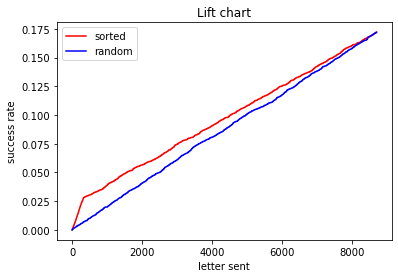

In [27]:
# for graphing Lift Chart

letter_sent = np.arange(1,len(logistic_result)+1)


s_rate_sorted = sort_result['c_sum']/len(letter_sent)
s_rate_rand = r_result['c_sum']/len(letter_sent)

plt.plot(letter_sent, s_rate_sorted, label='sorted', c='r')
plt.plot(letter_sent, s_rate_rand, label='random', c='b')

plt.title("Lift chart")
plt.xlabel('letter sent')
plt.ylabel('success rate')
plt.legend()
plt.show()

<h3>Cost-benefit analysis</h3>

<p>
    I have chosen unrealistic numbers for cost and benefit due to small size of test dataset. In this way, I can show the concept of maximimum profit. In real life scenario, the cost to send letter will be less than 1 dollar and the benefit will be around 1000 dollars. 
</p>

In [28]:
# cost to pay for each mail: $2
c_mail = 2

# benefit: $10
benefit = 10

In [29]:
# trying it with random result


c_b_dic_rand = {
    'no_of_letters_sent': letter_sent,
    'cost': letter_sent * c_mail,
    'benefit': r_result['c_sum'] * benefit
}

cost_benefit_df_rand = pd.DataFrame(c_b_dic_rand)

expected_revenue_for_rand = cost_benefit_df_rand['benefit'] - cost_benefit_df_rand['cost']
cost_benefit_df_rand['expected_revenue'] = expected_revenue_for_rand

cost_benefit_df_rand

,no_of_letters_sent,cost,benefit,expected_revenue
0,1,2,0,-2
1,2,4,0,-4
2,3,6,0,-6
3,4,8,0,-8
4,5,10,0,-10
...,...,...,...,...
8691,8692,17384,14960,-2424
8692,8693,17386,14960,-2426
8693,8694,17388,14960,-2428
8694,8695,17390,14960,-2430


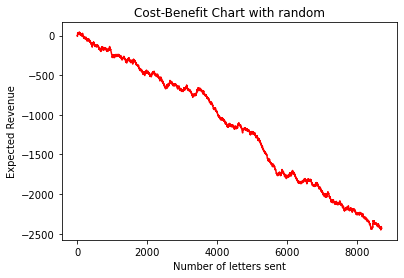

In [30]:
plt.plot(cost_benefit_df_rand['no_of_letters_sent'], cost_benefit_df_rand['expected_revenue'], c='r')

plt.title("Cost-Benefit Chart with random")
plt.xlabel('Number of letters sent')
plt.ylabel('Expected Revenue')
plt.show()

In [31]:
# trying it with sorted result


c_b_dic = {
    'no_of_letters_sent': letter_sent,
    'cost': letter_sent * c_mail,
    'benefit': sort_result['c_sum'] * benefit
}

cost_benefit_df = pd.DataFrame(c_b_dic)

expected_revenue = cost_benefit_df['benefit'] - cost_benefit_df['cost']
cost_benefit_df['expected_revenue'] = expected_revenue

cost_benefit_df

,no_of_letters_sent,cost,benefit,expected_revenue
7688,1,2,10,8
4681,2,4,20,16
6737,3,6,30,24
3502,4,8,40,32
5344,5,10,50,40
...,...,...,...,...
2965,8692,17384,14950,-2434
2964,8693,17386,14950,-2436
2963,8694,17388,14950,-2438
2962,8695,17390,14960,-2430


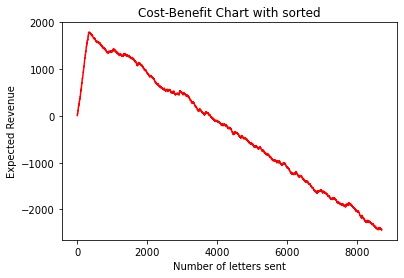

In [32]:
plt.plot(cost_benefit_df['no_of_letters_sent'], cost_benefit_df['expected_revenue'], c='r')

plt.title("Cost-Benefit Chart with sorted")
plt.xlabel('Number of letters sent')
plt.ylabel('Expected Revenue')
plt.show()

<h4>Comparing the actual profit and how many letters to send for random and sorted</h4>

In [33]:
# max profit for random
rand_max_profit = np.max(cost_benefit_df_rand['expected_revenue'])
print("Max Profit: $", rand_max_profit)

rand_max_profit_row = cost_benefit_df_rand[cost_benefit_df_rand['expected_revenue'] == rand_max_profit]

rand_no_of_letters = rand_max_profit_row['no_of_letters_sent'].tolist()[0]

print("Number of letters sent: ", rand_no_of_letters)

Max Profit: $ 42
Number of letters sent:  64


In [34]:
# max profit for sorted
sorted_max_profit = np.max(cost_benefit_df['expected_revenue'])
print("Max Profit: $", sorted_max_profit)

sorted_max_profit_row = cost_benefit_df[cost_benefit_df['expected_revenue'] == sorted_max_profit]

sorted_no_of_letters = sorted_max_profit_row['no_of_letters_sent'].tolist()[0]

print("Number of letters sent: ", sorted_no_of_letters)

Max Profit: $ 1790
Number of letters sent:  335


We can see from above results that by sending around 335 letters, we could get around $1790. The profit from random mailing is very low as seen above and should not be used.

In [37]:
# profit increase when change from random to sorted way of sending mail

profit_increased = sorted_max_profit - rand_max_profit

print("Profits Gained from targeting customers in a smart way compared to random selection by this amount: $", profit_increased)

Profits Gained from targeting customers in a smart way compared to random selection by this amount: $ 1748
